## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random
import cv2

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

## Data Load

In [2]:
!chmod 600 /content/kaggle.json #how to keep our api key unavailabe to others

!pip install --upgrade --force-reinstall --no-deps kaggle # update kaggle api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 5.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=aa6adfe5309d58b48cfff7ddc7311f53d4cde09d58d9702a4578cadb8472439b
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 95% 150M/158M [00:02<00:00, 59.4MB/s]
100% 158M/158M [00:02<00:00, 57.6MB/s]


In [ ]:
!unzip covid19-image-dataset.zip

## Data Processing

In [5]:
for dirpath,dirnames,filenames in os.walk("Covid19-dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Covid19-dataset'.
There are 3 directories and 0 images in 'Covid19-dataset/train'.
There are 0 directories and 70 images in 'Covid19-dataset/train/Normal'.
There are 0 directories and 111 images in 'Covid19-dataset/train/Covid'.
There are 0 directories and 70 images in 'Covid19-dataset/train/Viral Pneumonia'.
There are 3 directories and 0 images in 'Covid19-dataset/test'.
There are 0 directories and 20 images in 'Covid19-dataset/test/Normal'.
There are 0 directories and 26 images in 'Covid19-dataset/test/Covid'.
There are 0 directories and 20 images in 'Covid19-dataset/test/Viral Pneumonia'.


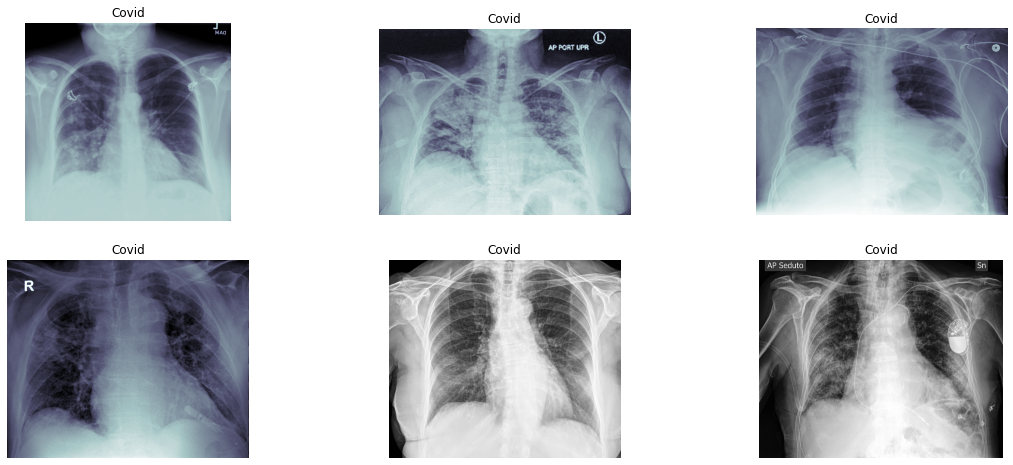

In [6]:
random_image = random.sample(os.listdir('Covid19-dataset/train/Covid'), 6)

fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

for i in np.arange(0, 6):
  img = mpimg.imread('Covid19-dataset/train/Covid/' + random_image[i])
  axes[i].imshow(img, cmap="bone")
  axes[i].set_title("Covid")
  axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)  

In [7]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train = 'Covid19-dataset/train'
test = 'Covid19-dataset/test'

train_gen = train_datagen.flow_from_directory(train,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="categorical")

test_gen = test_datagen.flow_from_directory(test,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


## Model Training

In [9]:
base_model = tf.keras.applications.VGG16(include_top=False)
base_model.trainable = False

inputs = Input(shape=(224, 224, 3), name="input_layer") 
x = base_model(inputs, training=False) 
x = GlobalAveragePooling2D(name="global_average_pooling")(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(3, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling (Glo  (None, 512)              0         
 balAveragePooling2D)                                            
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 3)                 99     

In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_gen,
          epochs=20,
          validation_data=test_gen)

Epoch 1/20
8/8 [==============================] - 26s 2s/step - loss: 1.1295 - accuracy: 0.3506 - val_loss: 1.0798 - val_accuracy: 0.3939
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 1.0396 - accuracy: 0.4422 - val_loss: 1.0162 - val_accuracy: 0.3939
Epoch 3/20
8/8 [==============================] - 13s 2s/step - loss: 0.9811 - accuracy: 0.5657 - val_loss: 0.9718 - val_accuracy: 0.6818
Epoch 4/20
8/8 [==============================] - 13s 2s/step - loss: 0.9231 - accuracy: 0.6135 - val_loss: 0.9249 - val_accuracy: 0.5758
Epoch 5/20
8/8 [==============================] - 13s 2s/step - loss: 0.8626 - accuracy: 0.5857 - val_loss: 0.8430 - val_accuracy: 0.6970
Epoch 6/20
8/8 [==============================] - 13s 2s/step - loss: 0.7876 - accuracy: 0.6892 - val_loss: 0.7703 - val_accuracy: 0.7576
Epoch 7/20
8/8 [==============================] - 13s 2s/step - loss: 0.7170 - accuracy: 0.7809 - val_loss: 0.6974 - val_accuracy: 0.8636
Epoch 8/20
8/8 [==================

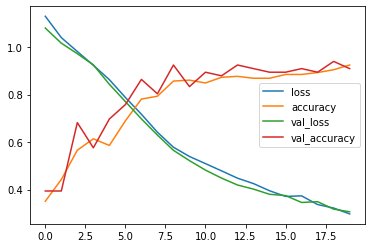

In [12]:
pd.DataFrame(history.history).plot();

In [13]:
model.evaluate(test_gen)

3/3 [==============================] - 1s 375ms/step - loss: 0.3063 - accuracy: 0.9091


[0.30633726716041565, 0.9090909361839294]

**Save the model**

In [14]:
model.save("covid_model.h5")